# Предсказываю среднее значение за прошедшие 3 недели

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
train_df = pd.read_parquet('data/train.parquet')
train_df.head()

,Values
0_0_0,133.0
0_0_1,114.0
0_0_2,140.0
0_0_3,106.0
0_0_4,117.0


In [3]:
index_split = train_df.index.str.split('_')

In [4]:
train_df['row_num'] = index_split.str.get(0)
train_df['row_type'] = index_split.str.get(1)
train_df['timestamp'] = index_split.str.get(-1).astype(int)
train_df['row_id'] = train_df['row_num'] + '_' + train_df['row_type']

train_df.head()

,Values,row_num,row_type,timestamp,row_id
0_0_0,133.0,0,0,0,0_0
0_0_1,114.0,0,0,1,0_0
0_0_2,140.0,0,0,2,0_0
0_0_3,106.0,0,0,3,0_0
0_0_4,117.0,0,0,4,0_0


In [5]:
time_line_df = train_df.pivot(index='row_id', columns='timestamp', values='Values')
time_line_df.columns = ['tr_' + str(col) for col in time_line_df.columns]

In [6]:
MIN_DAY = 0
time_line_df = time_line_df.iloc[:, MIN_DAY:]

In [7]:
time_line_df.head()

,tr_0,tr_1,tr_2,tr_3,tr_4,tr_5,tr_6,tr_7,tr_8,tr_9,...,tr_17746,tr_17747,tr_17748,tr_17749,tr_17750,tr_17751,tr_17752,tr_17753,tr_17754,tr_17755
row_id,,,,,,,,,,,,,,,,,,,,,
0_0,133.0000,114.0000,140.0000,106.0000,117.0000,110.0000,130.0000,112.0000,115.0000,93.0000,...,446.0000,468.0000,447.0000,443.0000,476.0000,509.0000,462.0000,412.0000,429.0000,430.0000
0_1,0.0603,0.0532,0.0622,0.0452,0.0574,0.0545,0.0566,0.0606,0.0479,0.0477,...,0.1498,0.1595,0.1527,0.1491,0.1554,0.1643,0.1621,0.1450,0.1480,0.1488
0_2,65.8000,66.9000,66.8000,68.9000,67.4000,65.5000,66.4000,63.0000,67.3000,65.7000,...,61.6000,61.7000,61.8000,62.5000,62.4000,62.7000,62.7000,62.5000,62.3000,61.8000
100_0,124.0000,125.0000,127.0000,121.0000,121.0000,132.0000,124.0000,116.0000,116.0000,118.0000,...,261.0000,281.0000,222.0000,254.0000,284.0000,286.0000,264.0000,281.0000,288.0000,291.0000
100_1,0.0493,0.0475,0.0486,0.0481,0.0478,0.0496,0.0446,0.0467,0.0443,0.0494,...,0.0873,0.0932,0.0763,0.0874,0.0970,0.0905,0.0824,0.0915,0.0985,0.1079


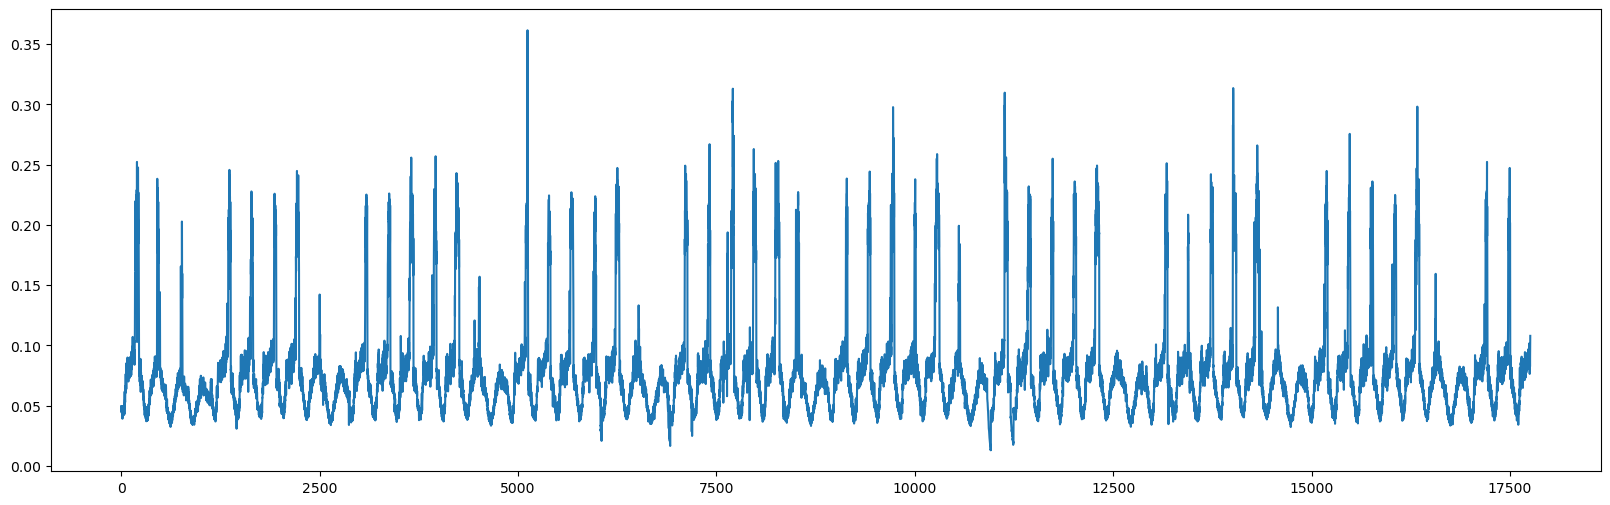

In [8]:
sns.lineplot(x=np.arange(time_line_df.shape[1]), y=time_line_df.iloc[4, :].values, n_boot=0)
plt.gcf().set_size_inches(20, 6)

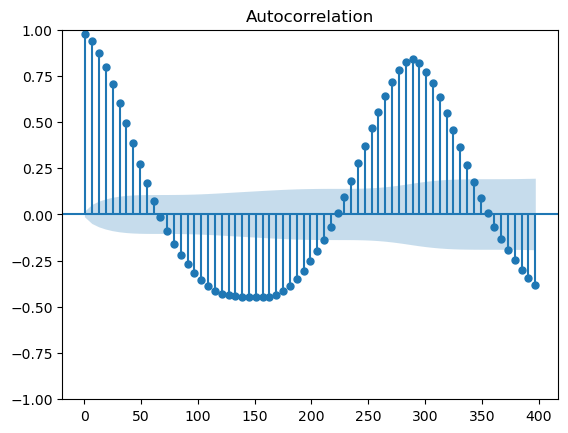

In [9]:
plot_acf(
    time_line_df.iloc[0, :].values, 
    lags=np.arange(1, 400, 6))
plt.show()

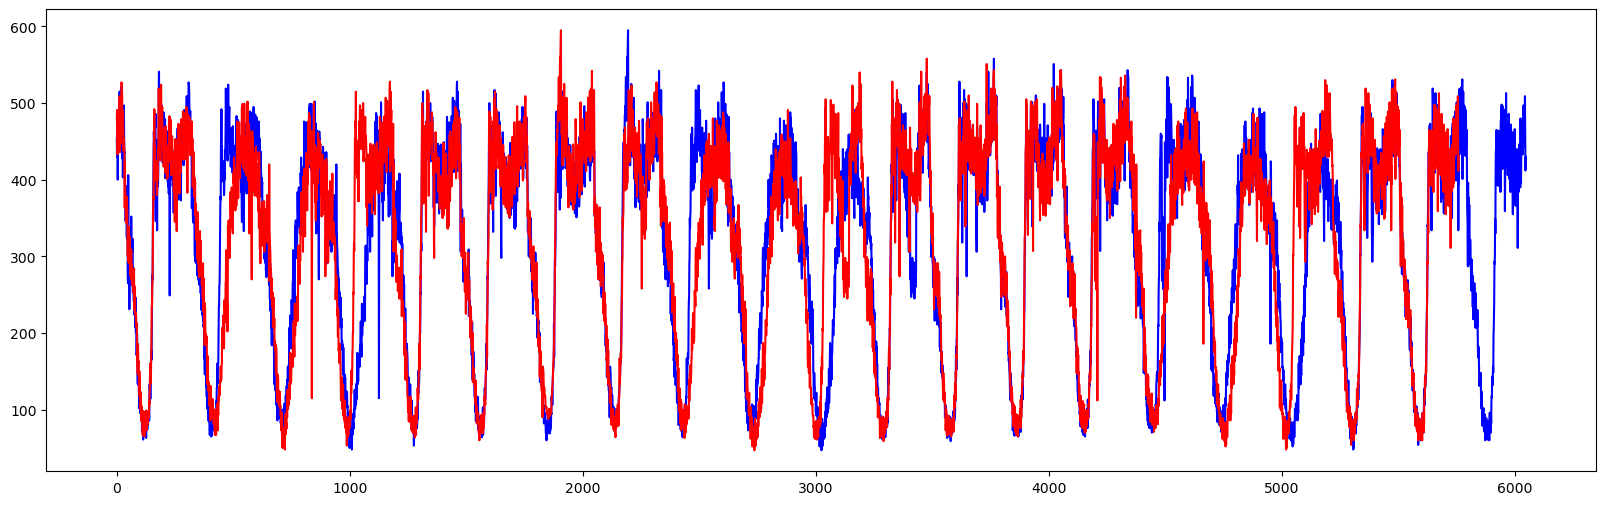

In [10]:
period = 288
n_periods = 21


sns.lineplot(
    x=np.arange(period * n_periods), 
    y=time_line_df.iloc[0, -period * n_periods:].values, 
    n_boot=0, 
    c='b'
)

sns.lineplot(
    x=np.arange(period * (n_periods - 1)), 
    y=time_line_df.iloc[0, -period * (n_periods - 1):].values, 
    n_boot=0, 
    c='r'
)

plt.gcf().set_size_inches(20, 6)

# Make simple prediction

In [11]:
day_period = 288
week_period = 7 * 288

In [29]:
n_weeks = 4
n_predictions = 100
# n_predictions = day_period

train_df = []
for i in range(1, n_weeks + 1):
    train_df.append(
        time_line_df.iloc[:, -week_period * i: -week_period * i + n_predictions]\
            .set_axis([f'pred_{i}' for i in range(n_predictions)], axis=1)\
            .reset_index()
    )

train_df = pd.concat(train_df).groupby('row_id').mean()
train_df.head()

,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,...,pred_90,pred_91,pred_92,pred_93,pred_94,pred_95,pred_96,pred_97,pred_98,pred_99
row_id,,,,,,,,,,,,,,,,,,,,,
0_0,458.75000,473.750000,468.250000,448.250000,431.750000,445.250000,476.000000,475.00000,488.250000,475.000000,...,156.000000,155.250000,154.250000,131.000000,140.750000,125.500000,123.500000,126.250000,126.000000,112.250000
0_1,0.15060,0.152175,0.153900,0.147975,0.139225,0.147775,0.156675,0.14990,0.154475,0.147275,...,0.066125,0.068325,0.069575,0.061450,0.064275,0.056975,0.058150,0.062700,0.059025,0.054100
0_2,62.95000,63.275000,63.375000,63.175000,63.650000,63.050000,63.025000,63.97500,64.025000,64.650000,...,66.500000,65.375000,64.475000,64.725000,64.200000,65.450000,64.900000,63.750000,63.200000,63.500000
100_0,301.50000,293.000000,303.000000,300.250000,302.000000,301.500000,312.000000,305.00000,299.500000,298.000000,...,142.500000,141.250000,139.750000,143.500000,137.500000,133.250000,133.500000,135.750000,124.250000,130.500000
100_1,0.10115,0.121650,0.118775,0.128100,0.157850,0.159375,0.178875,0.18925,0.156125,0.140000,...,0.052175,0.052125,0.051225,0.051725,0.049500,0.048275,0.049925,0.050325,0.047475,0.048425


In [30]:
# sns.lineplot(
#     x=np.arange(n_predictions), 
#     y=train_df.iloc[0, :].values, 
#     n_boot=0, 
#     c='b'
# )

# sns.lineplot(
#     x=np.arange(period * (n_periods - 1)), 
#     y=time_line_df.iloc[0, -period * (n_periods - 1):].values, 
#     n_boot=0, 
#     c='r'
# )

In [31]:
res = train_df.iloc[:, -100:].melt(ignore_index=False, value_name='Expected', var_name='pred_timestamp')
index_split_res = res.index.str.split('_')
res['row_num'] = index_split_res.str.get(0).astype(int)
res['row_type'] = index_split_res.str.get(1).astype(int)
res['timestamp'] = res.pred_timestamp.str.split('_').str.get(1).astype(int)
res['Id'] = res.index + '_' + res.timestamp.astype(str)
res.sort_values(['row_num', 'row_type', 'timestamp'], inplace=True)
res

,pred_timestamp,Expected,row_num,row_type,timestamp,Id
row_id,,,,,,
0_0,pred_0,458.750,0,0,0,0_0_0
0_0,pred_1,473.750,0,0,1,0_0_1
0_0,pred_2,468.250,0,0,2,0_0_2
0_0,pred_3,448.250,0,0,3,0_0_3
0_0,pred_4,431.750,0,0,4,0_0_4
...,...,...,...,...,...,...
169_2,pred_95,65.050,169,2,95,169_2_95
169_2,pred_96,65.075,169,2,96,169_2_96
169_2,pred_97,65.050,169,2,97,169_2_97


In [32]:
res[['Id', 'Expected']].reset_index(drop=True).to_csv('test.csv', index=None)

# Create train_test split

In [ ]:
day_period = 288 
n_days_feutures = 15

total_period = day_period * n_days_feutures
train_df = []
feature_names = [f'tr_{i}' for i in range(total_period)]
for i in range(total_period, time_line_df.shape[1], total_period):
    start = time_line_df.shape[1] - i
    end = time_line_df.shape[1] - i + total_period

    train_df.append(
        time_line_df.iloc[:, start: end]\
            .set_axis(feature_names, axis=1)\
            .reset_index()\
            .assign(start_time=start)
    )

train_df = pd.concat(train_df)
train_df.sort_values(by='start_time', inplace=True)
train_df['start_time'] = train_df['start_time'].map(
    {key: value for value, key in enumerate(sorted(train_df['start_time'].unique()))}
)
train_df.head()

In [ ]:
train_df['start_time'].value_counts()

In [ ]:
train_df[train_df['start_time'] == 0]

In [ ]:
X = train_df[['row_id'] + feature_names].iloc[:, :-day_period]
Y = train_df[['row_id'] + feature_names].iloc[:, -day_period:]

In [ ]:
X = X.groupby('row_id').mean()

In [ ]:
X.head().iloc[:, list(range(day_period * 7, day_period * 7 + day_period))]

In [ ]:
sns.lineplot(
    x=np.arange(period * n_periods), 
    y=time_line_df.iloc[0, -period * n_periods:].values, 
    n_boot=0, 
    c='b'
)

sns.lineplot(
    x=np.arange(period * (n_periods - 1)), 
    y=time_line_df.iloc[0, -period * (n_periods - 1):].values, 
    n_boot=0, 
    c='r'
)